In [1]:
import tracer_tools.noble_gas_tools as ng
import tracer_tools.He_tools as He
import matplotlib.pyplot as plt
import numpy as np
#import pandas as pd
#import scipy.integrate as intgrt
import os
os.getcwd()


'C:\\Users\\Fanka Neumann\\Documents\\Codes_MA\\tracer_tools_py3\\example'

#### Defining a rock type
The values are not based on any specific real sample, but rather meant to demonstrate the use of He_tools

In [2]:
#defining a composition
sramek_granite_composition = {'Li':3.4e-5,  'C':2.3e-4, 'O':0.494, 'F':1.28e-3, 'Na':0.03, 'Mg':4.72e-3, 'Al':0.0815, \
                              'Si': 0.318, 'P':  6.11e-4, 'K':0.0370, 'Ca':0.0130, 'Ti': 2.84e-3, 'Fe':0.0185, 'Sr':4.75e-4, \
                              'Ba': 1.88e-3, 'Th': 2.47e-5, 'U':  1.95e-6 }
# elemental weight fractions, rho_total = 2.7 g/cm^3

#creating the object
Srk_gran=He.rock_type(name='Granite from Sramek 2017', composition=sramek_granite_composition)
Srk_gran.density = 2.7 #g/cm^3 
#give depth range
Srk_gran.APR.depth = np.arange(0,7500,2) #g/cm^2 


#### Running the calculation

In [3]:
Srk_gran.calcAr_prod_rate_whole_rock(solar='avg',calc_flux=1)

#### Visualizing the results

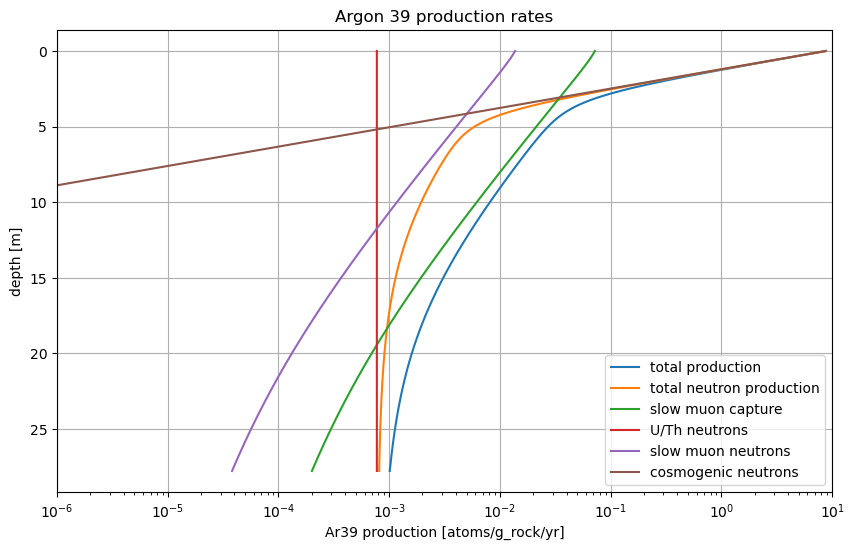

In [4]:
depth=Srk_gran.APR.depth/Srk_gran.density/100 # (g/cm^2) / (g/cm^3) / 100 = m

plt.figure(figsize=(10,6))
plt.title('Argon 39 production rates')
plt.plot(Srk_gran.APR.Ar39_value, depth, label='total production')
plt.plot(Srk_gran.APR.P39Ar_n, depth, label='total neutron production')
plt.plot(Srk_gran.APR.P39Ar_mu, depth, label='slow muon capture')
plt.plot(Srk_gran.APR.P39Ar_alpha_n, depth, label='U/Th neutrons')
plt.plot(Srk_gran.APR.P39Ar_mu_n,depth, label='slow muon neutrons')
plt.plot(Srk_gran.APR.P39Ar_ev_n, depth, label='cosmogenic neutrons')
plt.gca().invert_yaxis()
plt.ylabel('depth [m]')
plt.xlabel('Ar39 production [atoms/g_rock/yr]')
plt.xscale('log')
plt.xlim(1e-6,10)
plt.grid(True)
plt.legend()